<a href="https://colab.research.google.com/github/yashodharatomar/credit_card_fraud_detection/blob/main/LogisticRegression%2CKNClassifier%2CGaussianNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import scipy
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
sns.set(color_codes=True)


file_link = "/content/drive/MyDrive/creditcard.csv"
credit_data = pd.read_csv(file_link, sep=",")
n=credit_data.shape[0]
credit_data.index=range(1,n+1)
credit_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 1 to 284807
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print(credit_data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
credit_data.groupby('Class').count()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [ ]:
duplicate_data=credit_data.drop_duplicates(subset=None,keep='first',inplace=False)

print('Shape of Original dataset:',credit_data.shape)
print('Shape of dataset after dropping duplicates:',duplicate_data.shape)

Shape of Original dataset: (284807, 31)
Shape of dataset after dropping duplicates: (283726, 31)


Since, Shape of dataset after dropping duplicates is less, so there exists some duplicates in the given dataset, so, we will drop those for further evaluation.

In [ ]:
credit_data=duplicate_data
credit_data.shape

(283726, 31)

In [ ]:
credit_data.groupby('Class').count()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,...,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253
1,473,473,473,473,473,473,473,473,473,473,...,473,473,473,473,473,473,473,473,473,473


#Model

In [ ]:
X=credit_data.drop('Class',axis=1)
Y=credit_data['Class']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
model1=GaussianNB()
model2=LogisticRegression()
model=[model1,model2]
Y_pred=[]
for i in model:
    pipe=make_pipeline(StandardScaler(),i)
    pipe.fit(X_train,Y_train)
    pred=pipe.predict(X_test)
    Y_pred.append(pred)
    score=accuracy_score(Y_test,pred)*100
    print(str(i),':',score)
model3=KNeighborsClassifier()
model3.fit(X_train,Y_train)
pred=model3.predict(X_test)
Y_pred.append(pred)
score=accuracy_score(Y_test,pred)*100
print(str(model3),':',score)

GaussianNB() : 97.74430790197138
LogisticRegression() : 99.91541154632392
KNeighborsClassifier() : 99.85079536643248


Gaussian Naive Bayes:

Confusion Matrix:
             Prediction:0  Prediction:1
Original:0         83094          1895
Original:1            25           104
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     84989
           1       0.05      0.81      0.10       129

    accuracy                           0.98     85118
   macro avg       0.53      0.89      0.54     85118
weighted avg       1.00      0.98      0.99     85118

ROC accuracy: 0.891952273623007


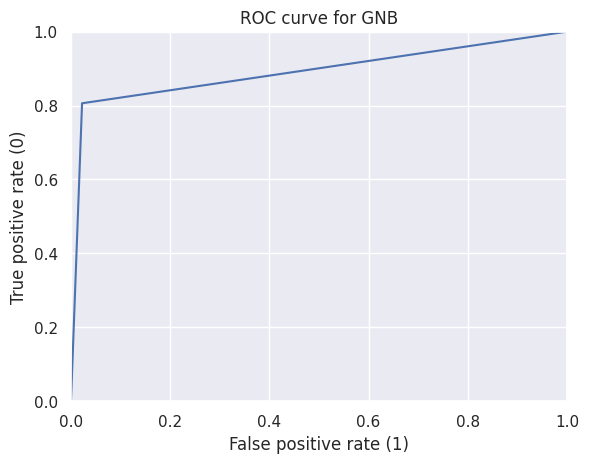

In [ ]:
G=pd.DataFrame(confusion_matrix(Y_test,Y_pred[0]),columns=['Prediction:0','Prediction:1'],index=['Original:0','Original:1'])
print('Confusion Matrix:\n',G)
print('Classification Report:\n',classification_report(Y_test,Y_pred[0]))

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred[0])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for GNB')
plt.xlabel('False positive rate (1)')
plt.ylabel('True positive rate (0)')
plt.grid(True)
print('ROC accuracy:',roc_auc_score(Y_test,Y_pred[0]))

Logistic Regression

Confusion Matrix:
             Prediction:0  Prediction:1
Original:0         84976            13
Original:1            59            70
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.84      0.54      0.66       129

    accuracy                           1.00     85118
   macro avg       0.92      0.77      0.83     85118
weighted avg       1.00      1.00      1.00     85118

ROC accuracy: 0.7712413489716545


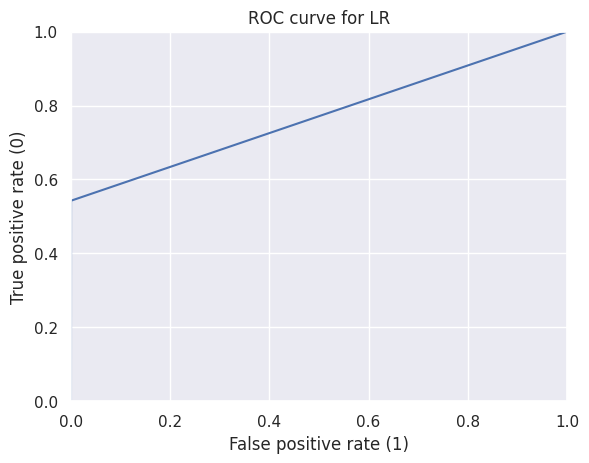

In [ ]:
LR=pd.DataFrame(confusion_matrix(Y_test,Y_pred[1]),columns=['Prediction:0','Prediction:1'],index=['Original:0','Original:1'])
print('Confusion Matrix:\n',LR)
print('Classification Report:\n',classification_report(Y_test,Y_pred[1]))

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred[1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for LR')
plt.xlabel('False positive rate (1)')
plt.ylabel('True positive rate (0)')
plt.grid(True)
print('ROC accuracy:',roc_auc_score(Y_test,Y_pred[1]))

K Neighbors Classifier

Confusion Matrix:
             Prediction:0  Prediction:1
Original:0         84989             0
Original:1           127             2
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       1.00      0.02      0.03       129

    accuracy                           1.00     85118
   macro avg       1.00      0.51      0.51     85118
weighted avg       1.00      1.00      1.00     85118

ROC accuracy: 0.5077519379844961


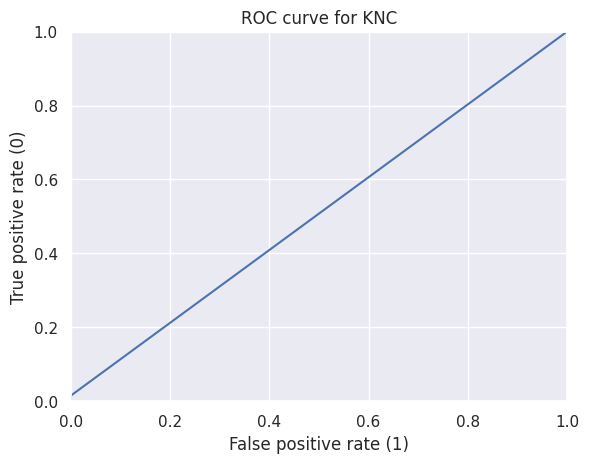

In [ ]:
KNC=pd.DataFrame(confusion_matrix(Y_test,Y_pred[2]),columns=['Prediction:0','Prediction:1'],index=['Original:0','Original:1'])
print('Confusion Matrix:\n',KNC)
print('Classification Report:\n',classification_report(Y_test,Y_pred[2]))

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred[2])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for KNC')
plt.xlabel('False positive rate (1)')
plt.ylabel('True positive rate (0)')
plt.grid(True)
print('ROC accuracy:',roc_auc_score(Y_test,Y_pred[2]))